In [1]:
import numpy as np
from numpy import random
import numpy.matlib
import matplotlib.pyplot as plt

# high resolution plots 
plt.rcParams['figure.dpi'] = 200

# **Assignment 7: Deep Learning**

AM 9624 | Karnav Raval 

## **Functions**

### Main function

Combines the invidual functions that trains and tests the neural network.

In [2]:
def wk10(outi, niterations, alpha, monitor):
    # input arguments
    # outi:         output index
    #               controls the output that is printed to the terminal
    #               1 = cost before and after training
    #               2 = training accuracy
    #               3 = test accuracy 
    # niterations:  number of iterations through the training set (epochs)
    # alpha:        learning rate 
    # monitor:      controls figure output
    #               0 = no figures
    #               1 = figures

    # seed the random number generator (to ensure that we all generate the same data and initial weights)
    random.seed(3)

    # generate training data
    means = (0.3,0.7)
    sigma = 0.16
    ndatapoints_train = 128
    data_output_train = generate_data(means, sigma, ndatapoints_train)  
    data_train = data_output_train[0]
    randvec_train = data_output_train[1]

    # generate test data
    means = (0.3,0.7)
    sigma = 0.16
    ndatapoints_test = 128
    data_output_test = generate_data(means, sigma, ndatapoints_test)
    data_test = data_output_test[0]
    randvec_test = data_output_test[1]

    # unpack training and testing data
    X_train = np.transpose(data_train[:,0:2])
    y_train = np.transpose(data_train[:,2:3])
    X_test = np.transpose(data_test[:,0:2])
    y_test = np.transpose(data_test[:,2:3])

    # initialize weights
    nweights = 2
    randn = 0    
    w, b = initialize_weights(nweights, randn)

    # optimize
    weights, gradients, costs = optimize(w, b, X_train, y_train, niterations, alpha, monitor)  

    # predict
    p_train = predict(data_train, weights)
    p_test = predict(data_test, weights)

    # show training and test data and decision boundaries
    if monitor:
        plt.ion()        
        # training data
        colors = plot_data(ndatapoints_train, data_output_train, 1)
        plot_boundary(weights, 1)
        # test data
        colors = plot_data(ndatapoints_test, data_output_test, 2)
        plot_boundary(weights, 2)

    # print results
    if outi == 1:
        print("cost at start and end:",costs[0],costs[niterations-1])
    if outi == 2:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(p_train - y_train)) * 100))
    if outi == 3:
        print("test accuracy: {} %".format(100 - np.mean(np.abs(p_test - y_test)) * 100))


### Constituent Functions

Individual functions that are used to train and test the neural network, along with data generation and plotting.

In [3]:
# generate data (input x and output f(x)) 
def generate_data(means, sigma, ndatapoints):
    nclasses = 2
    data = np.zeros((nclasses * ndatapoints, 3))
    for c in range(0, nclasses):
        starti = c * ndatapoints
        endi = (c + 1) * ndatapoints
        data[starti:endi, 0:2] = means[c] + sigma * random.standard_normal((ndatapoints, 2))
        data[starti:endi, 2] = c
    randvec = np.random.permutation(nclasses * ndatapoints)    
    data = data[randvec,:]
    return data, randvec;

# plot the data
def plot_data(ndatapoints, data_output, figi):
    data = data_output[0]
    randvec = data_output[1]    
    colors = np.concatenate((np.matlib.repmat(np.array([1, 0.5, 1]),ndatapoints,1),np.matlib.repmat(np.array([0.5, 1, 1]),ndatapoints,1),np.matlib.repmat(np.array([0.6, 1, 0.6]),ndatapoints,1),np.matlib.repmat(np.array([0.5, 0.5, 1]),ndatapoints,1)))
    colors = colors[randvec,:]
    plt.figure(figi)
    plt.scatter(data[:,0], data[:,1], c=colors, alpha=0.5)
    plt.axis('square')  
    plt.xlabel('x1 (0 = green, 1 = red)')
    plt.ylabel('x2 (0 = small, 1 = large)')
    if figi == 1:
        plt.title('training data')
    elif figi == 2:
        plt.title('test data')
    return colors

# initialize weights
def initialize_weights(nweights, randn):
    if randn == 0:
        w = np.zeros( (nweights, 1) )       
    else:
        w = 0.001 * random.standard_normal( (nweights, 1) )
    b = 0
    return w, b

# sigmoid activation function
def sigmoid(z):
    a = 1 / (1 + np.exp(-z))     
    return a

# propagate forward    
def forward(X, w, b): 
    z = np.dot(np.transpose(w), X) + b
    a = sigmoid(z)
    return a  

# compute cost
def compute_cost(a, y):
    m = a.shape[1] # number of training samples
    cost =  -(1 / m) * np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))
    return cost    

# propagate back  
def back(a, y, X):  
    m = a.shape[1]
    dw = (1 / m) * np.dot(X, np.transpose(a - y))
    db = (1 / m) * np.sum(a - y)
    return dw, db

# plot the decision boundary
def plot_boundary(weights, figi):
    b = weights['b']
    w = weights['w']    
    slope = -(b / w[1]) / (b / w[0])
    y_intercept = -b / w[1]
    x = np.linspace(0,1,100)
    y = (slope * x) + y_intercept
    plt.figure(figi)
    plt.plot(x, y)
    plt.pause(0.004)

# optimize using gradient descent
def optimize(w, b, X, y, niterations, alpha, monitor):

    costs = []

    for i in range(niterations):
        a = forward(X, w, b)
        cost = compute_cost(a, y)
        dw, db = back(a, y, X)

        w = w - alpha * dw
        b = b - alpha * db

        costs.append(cost)

        if monitor and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))           

    weights = {"w": w,
              "b": b}

    gradients = {"dw": dw,
                "db": db}

    return weights, gradients, costs 

# predict
def predict(data, weights):
    X = np.transpose( data[:,0:2] )
    y = np.transpose(data[:,2:3]) 

    a = forward(X, weights['w'], weights['b'])
    p = np.zeros(a.shape)
    for i in range(a.shape[1]):
        if a[0,i] <= 0.5:
            p[0,i] = 0
        else:
            p[0,i] = 1

    return p

## **Testing Code**

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.182295
Cost after iteration 200: 0.149455
Cost after iteration 300: 0.136801
Cost after iteration 400: 0.130014
Cost after iteration 500: 0.125779
Cost after iteration 600: 0.122895
Cost after iteration 700: 0.120815
Cost after iteration 800: 0.119253
Cost after iteration 900: 0.118044
Cost after iteration 1000: 0.117087
Cost after iteration 1100: 0.116314
Cost after iteration 1200: 0.115681
Cost after iteration 1300: 0.115157
Cost after iteration 1400: 0.114717
Cost after iteration 1500: 0.114345
Cost after iteration 1600: 0.114028
Cost after iteration 1700: 0.113756
Cost after iteration 1800: 0.113522
Cost after iteration 1900: 0.113319
Cost after iteration 2000: 0.113141
Cost after iteration 2100: 0.112986
Cost after iteration 2200: 0.112850
Cost after iteration 2300: 0.112730
Cost after iteration 2400: 0.112624
Cost after iteration 2500: 0.112530
Cost after iteration 2600: 0.112446
Cost after iteration 2700: 0.112372
Cost

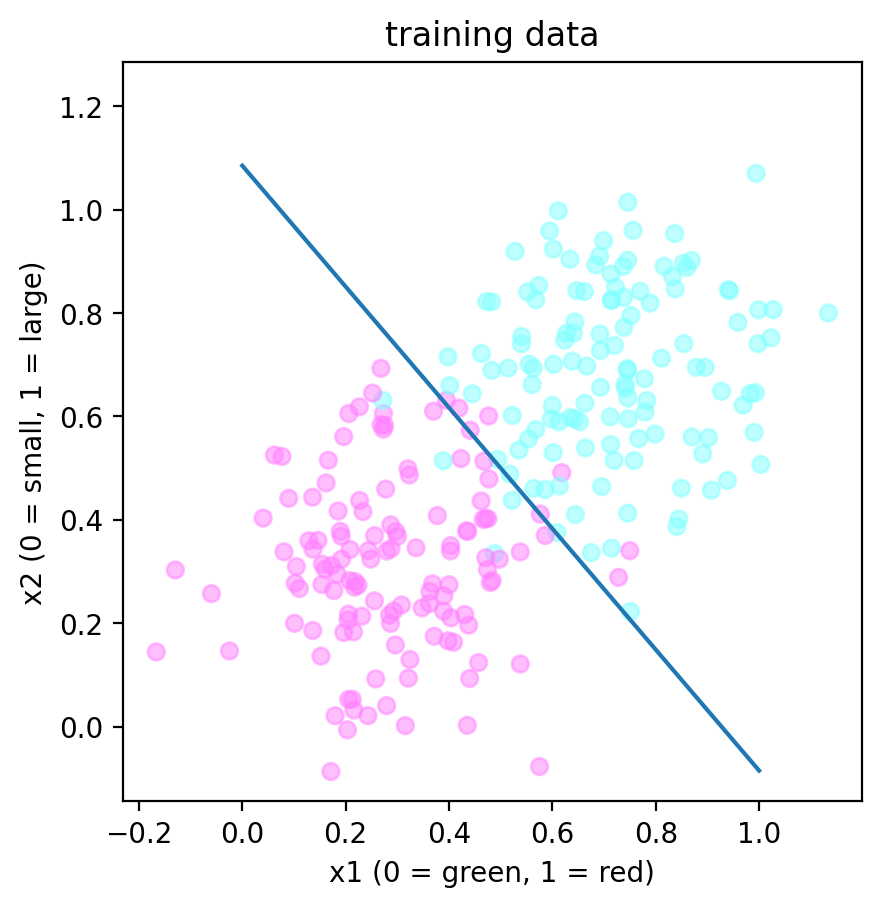

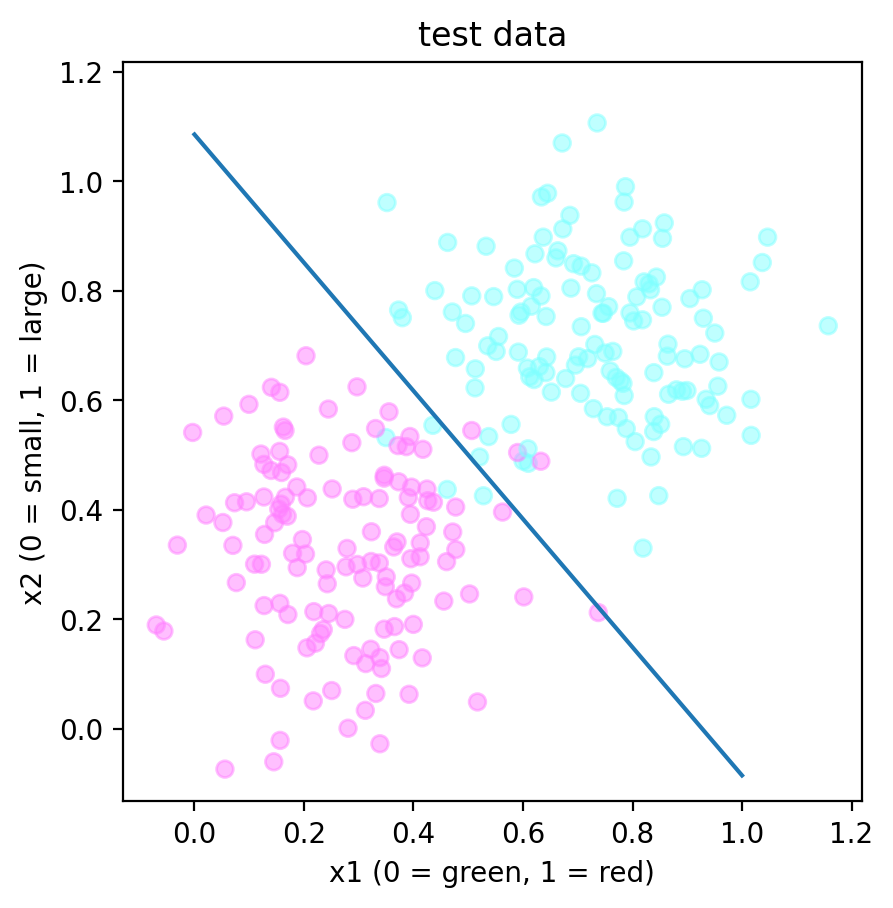

test accuracy: 97.265625 %


In [4]:
wk10(3, 10000, 3.0, 1)

Observe that for lower number of iterations and learning rate, we don't quite converge to the minimum cost, leading to poor performance on the test set. This is exactly as expected. 

Cost after iteration 0: 0.693147


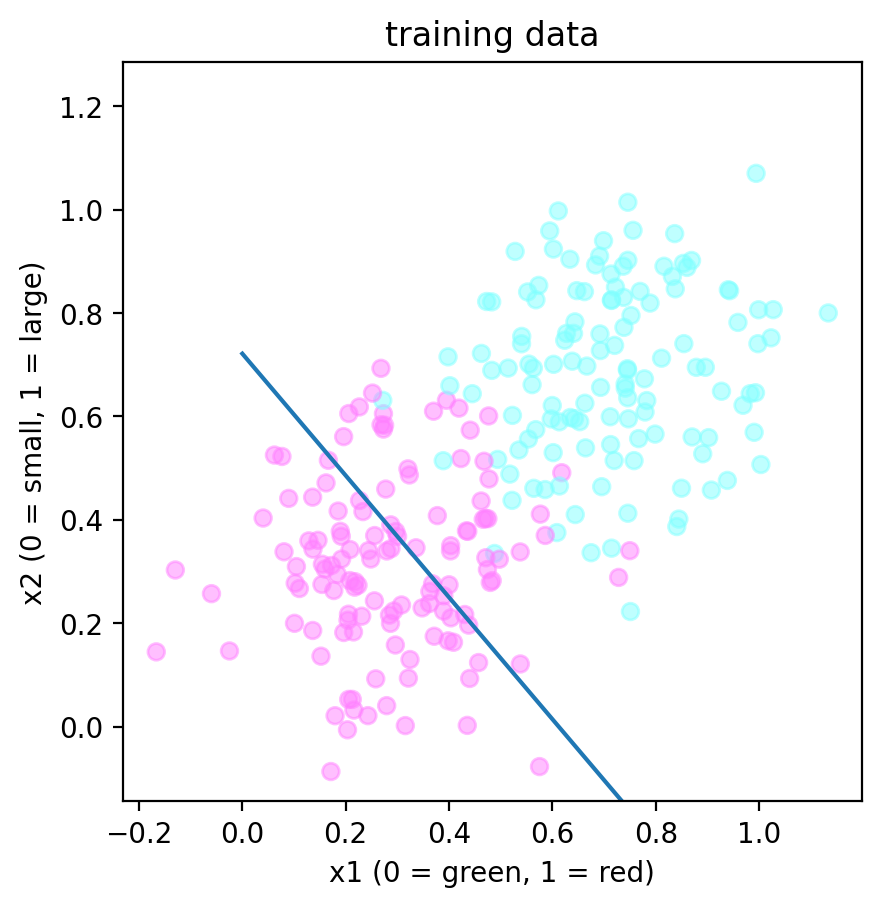

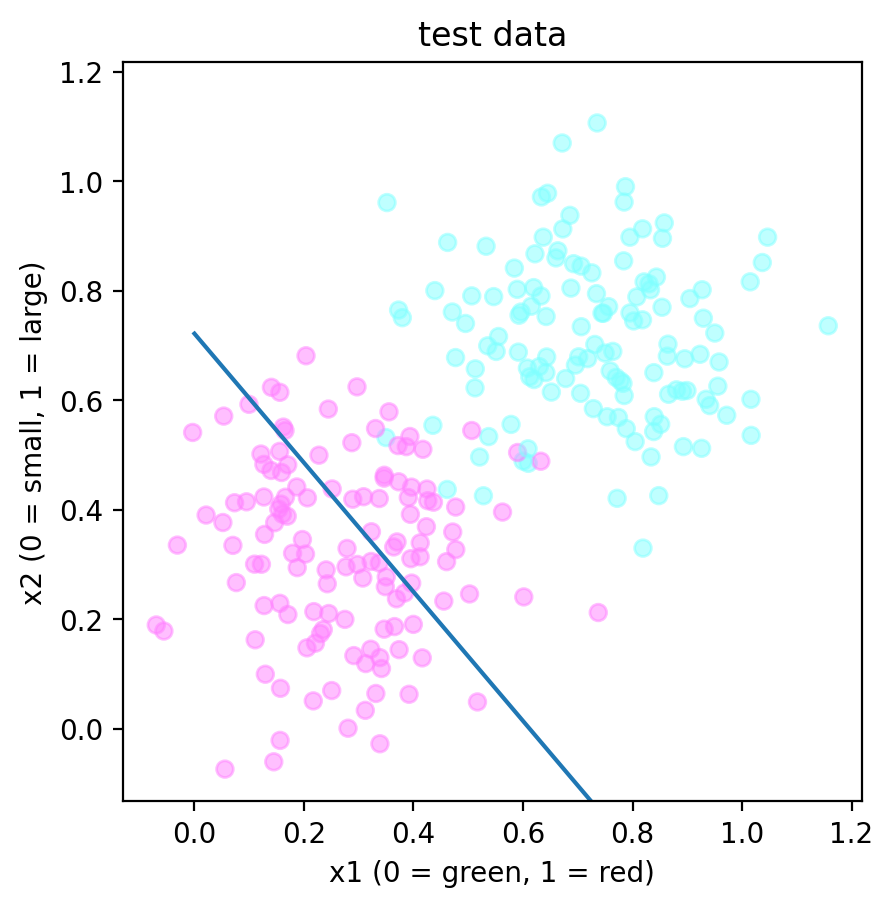

test accuracy: 81.25 %


In [10]:
wk10(3, 10, 1.0, 1)